In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def split_comma_separated_index(series,delim=','):
    '''split comma separated items in series index, assign 1/n_names
    of value/count to each individual item.'''
    # split grants with multiple institutions
    for row in series.iteritems():
        name = row[0]
        amount = row[1]
        
        names = name.split(delim)
        n_names = len(names)
        if n_names>1:
            series = series.drop(name)
            
            for idx in names:
                idx = idx.strip()
                if series.index.contains(idx):
                    series[idx] += amount/n_names
                else:
                    series = series.append(pd.Series([amount/n_names],index=[idx]))
            
    return series

In [3]:
master = pd.read_excel('data/ResearchFish/ResearchFish_master.xlsx')
master['Award Start Date'] = pd.to_datetime(master['Award Start Date'])
master['Award Start Year'] = master['Award Start Date'].dt.year
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 40 columns):
MasterID                                   283 non-null object
Award Reference                            286 non-null object
Award Type                                 208 non-null object
Title                                      286 non-null object
RO Location ID                             286 non-null object
RO                                         286 non-null object
Award Start Date                           286 non-null datetime64[ns]
Award End Date                             286 non-null object
Funding Value                              286 non-null int64
RF UID                                     284 non-null float64
PI ID                                      285 non-null float64
PI Name                                    285 non-null object
PI Surname                                 285 non-null object
PI Email                                   285 non-null object
Tech

In [4]:
'''
glaucoma_ids = pd.read_excel('data/combined.xlsx')
glaucoma_ids = glaucoma_ids[glaucoma_ids['Disease Area']=='Glaucoma']
glaucoma_ids = glaucoma_ids['MasterID']

master = master[master['MasterID'].isin(glaucoma_ids)]
'''

"\nglaucoma_ids = pd.read_excel('data/combined.xlsx')\nglaucoma_ids = glaucoma_ids[glaucoma_ids['Disease Area']=='Glaucoma']\nglaucoma_ids = glaucoma_ids['MasterID']\n\nmaster = master[master['MasterID'].isin(glaucoma_ids)]\n"

In [5]:
master['publications'].sum()

1013

In [6]:
ext_cols = ['facilities','technical-products','meetings_conferences_conference','creative-products','products-or-interventions',
        'research-database-models','publications','hrcs','influence-on-policy-and-practice','intellectual-property-and-licensing',
        'research-materials','next-destination-and-recruitment','sf2','awards-and-recognition','other-outputs-and-knowledge',
        'dissemination-to-non-academic-audiences','spin-outs','collaborations-and-partnerships','further-funding-for-your-research-group']

master[ext_cols].sum()


facilities                                   15
technical-products                            9
meetings_conferences_conference             503
creative-products                             4
products-or-interventions                    15
research-database-models                     25
publications                               1013
hrcs                                        492
influence-on-policy-and-practice             34
intellectual-property-and-licensing           9
research-materials                           64
next-destination-and-recruitment             92
sf2                                         297
awards-and-recognition                      334
other-outputs-and-knowledge                  78
dissemination-to-non-academic-audiences     553
spin-outs                                     5
collaborations-and-partnerships             297
further-funding-for-your-research-group     278
dtype: int64

In [7]:
further_funding = pd.read_excel('data/ResearchFish/ResearchFish_further-funding-for-your-research-group.xlsx')
#further_funding = further_funding[further_funding['MasterID'].isin(glaucoma_ids)]
further_funding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 42 columns):
Award Reference                   278 non-null object
Award Type                        233 non-null object
Title                             278 non-null object
RO Location ID                    278 non-null object
RO                                278 non-null object
Award Start Date                  278 non-null object
Award End Date                    278 non-null object
Funding Value                     278 non-null int64
RF UID                            275 non-null float64
PI ID                             278 non-null int64
PI Name                           278 non-null object
PI Surname                        278 non-null object
PI Email                          278 non-null object
Award Reporting Period ID         278 non-null object
Award Submission Date             242 non-null object
Entry ID                          278 non-null object
Entry Insert Date               

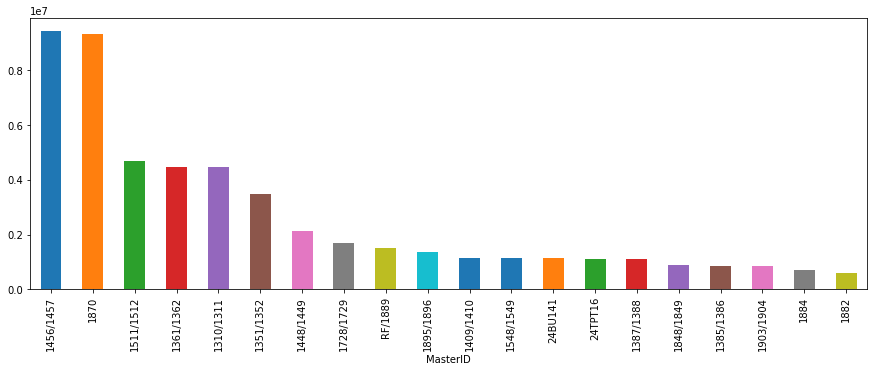

In [8]:
further_funding['Amount'] = further_funding['Amount'].str.replace(',','').astype(float)

further_by_award = further_funding.groupby('MasterID')['Amount'].sum()

plt.figure(figsize=(15,5))
further_by_award.sort_values(ascending=False).head(20).plot.bar()

109
108


Text(0.5,0,'No. of Awards')

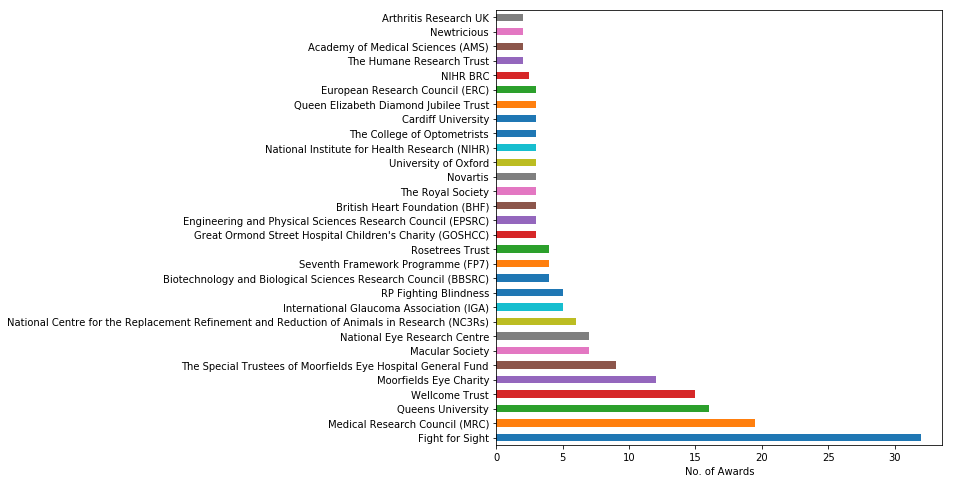

In [9]:
further_funding_inst_count = further_funding['Parent Org*'].value_counts()

print(len(further_funding_inst_count))
further_funding_inst_count = split_comma_separated_index(further_funding_inst_count)
print(len(further_funding_inst_count))

further_funding_inst_count = further_funding_inst_count.sort_values(ascending=False)

plt.figure(figsize=(8,8))
further_funding_inst_count.head(30).plot.barh()
plt.xlabel('No. of Awards')

109
108


10.855131

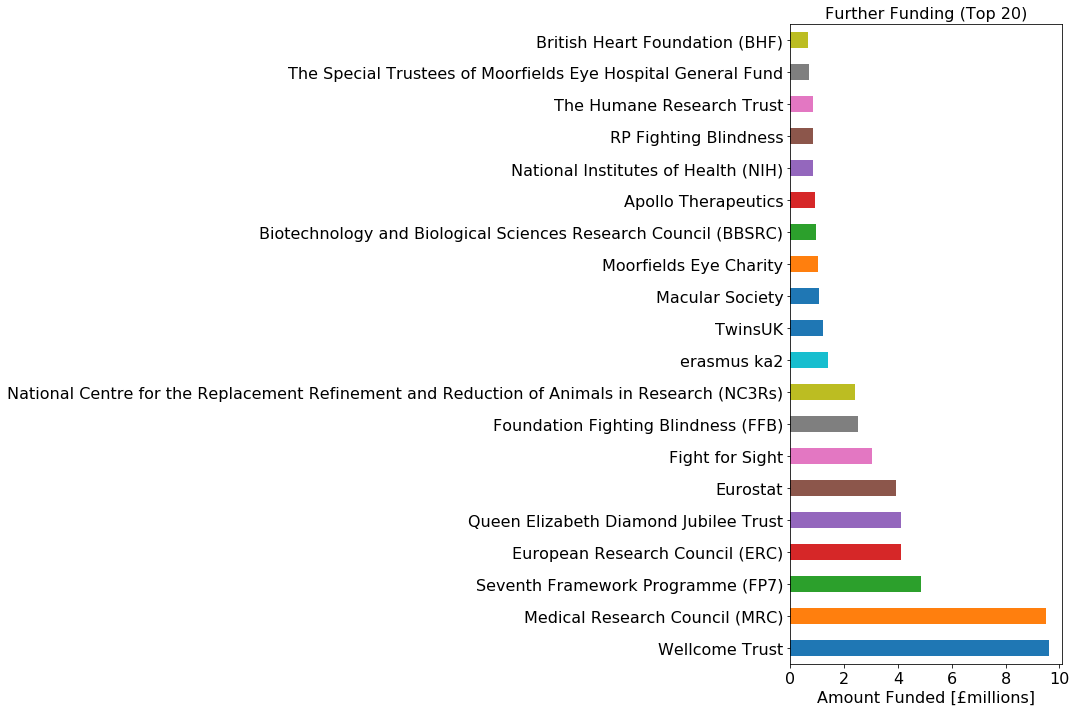

In [70]:
further_funding_inst_amount = further_funding.groupby('Parent Org*')['Amount'].sum()

print(len(further_funding_inst_amount))
further_funding_inst_amount = split_comma_separated_index(further_funding_inst_amount)
print(len(further_funding_inst_amount))

further_funding_inst_amount = further_funding_inst_amount.sort_values(ascending=False)
               
plt.figure(figsize=(15,10))
(further_funding_inst_amount/1e6).sort_values(ascending=False).head(20).plot.barh(fontsize=16)
plt.title('Further Funding (Top 20)',fontsize=16)
plt.xlabel('Amount Funded [£millions]',fontsize=16)
plt.ylabel('')

plt.tight_layout()
plt.savefig('plots/ResearchFish/further_funding_amount.png',dpi=300)

(further_funding_inst_amount/1e6)[20:].sum()

In [11]:
'''
hrcs                                        492
sf2                                         297

other-outputs-and-knowledge                  78
spin-outs                                     5
intellectual-property-and-licensing           9
influence-on-policy-and-practice             34
facilities                                   15
technical-products                            9
creative-products                             4
products-or-interventions                    15
research-database-models                     25
research-materials                           64

publications                               1013

collaborations-and-partnerships             297
further-funding-for-your-research-group     278
meetings_conferences_conference             503
next-destination-and-recruitment             92
dissemination-to-non-academic-audiences     553
awards-and-recognition                      334
'''

'\nhrcs                                        492\nsf2                                         297\n\nother-outputs-and-knowledge                  78\nspin-outs                                     5\nintellectual-property-and-licensing           9\ninfluence-on-policy-and-practice             34\nfacilities                                   15\ntechnical-products                            9\ncreative-products                             4\nproducts-or-interventions                    15\nresearch-database-models                     25\nresearch-materials                           64\n\npublications                               1013\n\ncollaborations-and-partnerships             297\nfurther-funding-for-your-research-group     278\nmeetings_conferences_conference             503\nnext-destination-and-recruitment             92\ndissemination-to-non-academic-audiences     553\nawards-and-recognition                      334\n'

In [12]:
collaborations = pd.read_excel('data/ResearchFish/ResearchFish_collaborations-and-partnerships.xlsx')
#collaborations = collaborations[collaborations['MasterID'].isin(glaucoma_ids)]

collaborations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 40 columns):
Award Reference                    297 non-null object
Award Type                         271 non-null object
Title                              297 non-null object
RO Location ID                     297 non-null object
RO                                 297 non-null object
Award Start Date                   297 non-null object
Award End Date                     297 non-null object
Funding Value                      297 non-null int64
RF UID                             294 non-null float64
PI ID                              297 non-null int64
PI Name                            297 non-null object
PI Surname                         297 non-null object
PI Email                           297 non-null object
Award Reporting Period ID          297 non-null object
Award Submission Date              249 non-null object
Entry ID                           297 non-null object
Entry Insert Dat

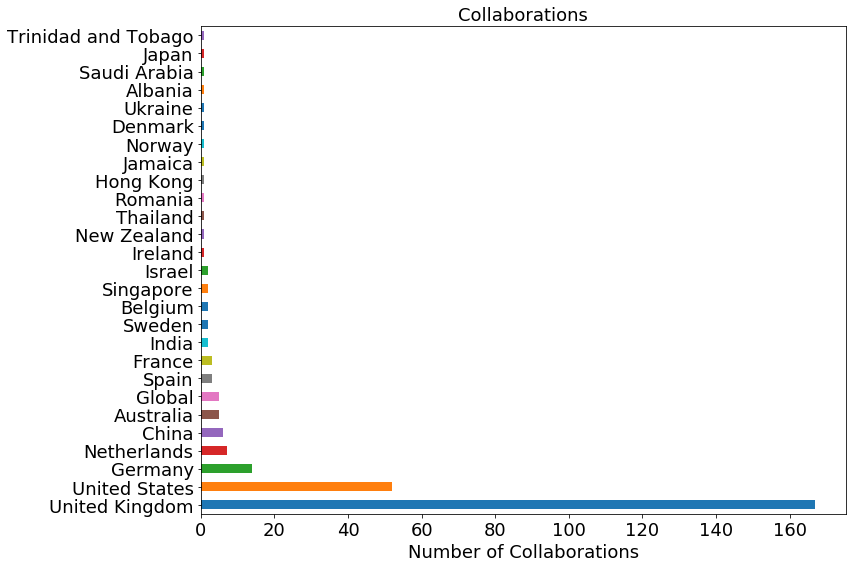

In [69]:
collabs = collaborations['Country'].value_counts()
countries = [word[0] for word in collabs.index.str.split(',')]
for i,country in enumerate(countries):
    if len(country.split())>3:
        countries[i] = country.split()[0]+' '+country.split()[1]
        
collabs.index = countries

plt.figure(figsize=(12,8))
collabs.plot.barh(fontsize=18)
plt.xlabel('Number of Collaborations',fontsize=18)
plt.title('Collaborations',fontsize=18)

plt.tight_layout()
plt.savefig('plots/ResearchFish/collabs.png',dpi=300)

In [14]:
meetings = pd.read_excel('data/ResearchFish/ResearchFish_meetings_conferences_conference.xlsx')
#meetings = meetings[meetings['MasterID'].isin(glaucoma_ids)]

meetings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 26 columns):
Award Reference              503 non-null object
Award Type                   412 non-null object
Title                        503 non-null object
RO Location ID               503 non-null object
RO                           503 non-null object
Award Start Date             503 non-null object
Award End Date               503 non-null object
Funding Value                503 non-null int64
RF UID                       503 non-null int64
PI ID                        503 non-null int64
PI Name                      503 non-null object
PI Surname                   503 non-null object
PI Email                     503 non-null object
Award Reporting Period ID    503 non-null object
Award Submission Date        370 non-null object
Entry ID                     503 non-null object
Entry Insert Date            503 non-null object
Name*                        503 non-null object
Start Month*    

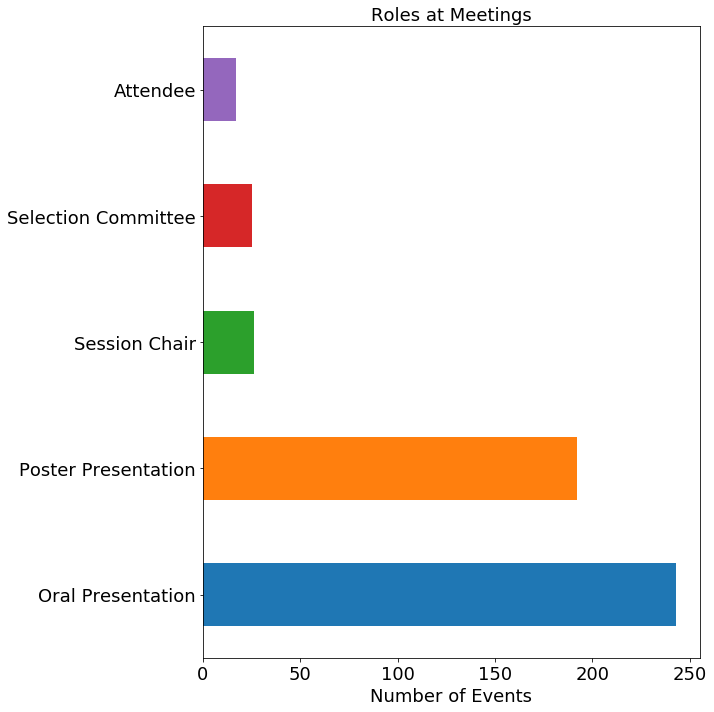

In [41]:
meeting_roles = meetings['Role*'].value_counts()
meeting_roles.index = ['Oral Presentation','Poster Presentation','Session Chair','Selection Committee','Attendee']

plt.figure(figsize=(10,10))
meeting_roles.plot.barh(fontsize=18)
plt.xlabel('Number of Events',fontsize=18)
plt.title('Roles at Meetings',fontsize=18)

plt.tight_layout()
plt.savefig('plots/ResearchFish/meeting_roles.png',dpi=300)

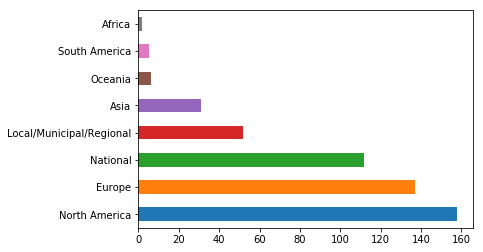

In [31]:
meetings['Where*'].value_counts().plot.barh()

In [17]:
nextdest = pd.read_excel('data/ResearchFish/ResearchFish_next-destination-and-recruitment.xlsx')
#nextdest = nextdest[nextdest['MasterID'].isin(glaucoma_ids)]

nextdest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 43 columns):
Award Reference                      92 non-null object
Award Type                           80 non-null object
Title                                92 non-null object
RO Location ID                       92 non-null object
RO                                   92 non-null object
Award Start Date                     92 non-null object
Award End Date                       92 non-null object
Funding Value                        92 non-null int64
RF UID                               91 non-null float64
PI ID                                92 non-null int64
PI Name                              92 non-null object
PI Surname                           92 non-null object
PI Email                             92 non-null object
Award Reporting Period ID            92 non-null object
Award Submission Date                72 non-null object
Entry ID                             92 non-null object
En

In [18]:
nextdest['Role in Group*'].value_counts()

Research Student            38
Post Doctoral Researcher    27
Research Fellow             12
Researcher (No PhD)          9
Research Project Leader      4
Technician                   2
Name: Role in Group*, dtype: int64

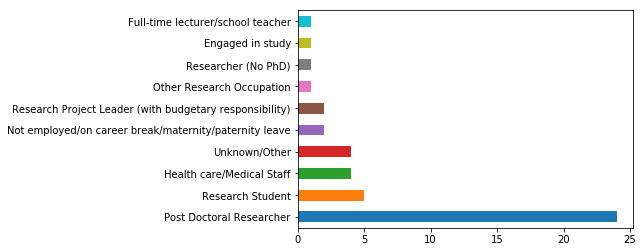

In [30]:
nextdest['Role after Group*'].value_counts().plot.barh()

In [20]:
outreach = pd.read_excel('data/ResearchFish/ResearchFish_dissemination-to-non-academic-audiences.xlsx')
#outreach = outreach[outreach['MasterID'].isin(glaucoma_ids)]

outreach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 61 columns):
Award Reference                    553 non-null object
Award Type                         507 non-null object
Title                              553 non-null object
RO Location ID                     553 non-null object
RO                                 553 non-null object
Award Start Date                   553 non-null object
Award End Date                     553 non-null object
Funding Value                      553 non-null int64
RF UID                             553 non-null int64
PI ID                              553 non-null int64
PI Name                            553 non-null object
PI Surname                         553 non-null object
PI Email                           553 non-null object
Award Reporting Period ID          553 non-null object
Award Submission Date              482 non-null object
Entry ID                           553 non-null object
Entry Insert Date 

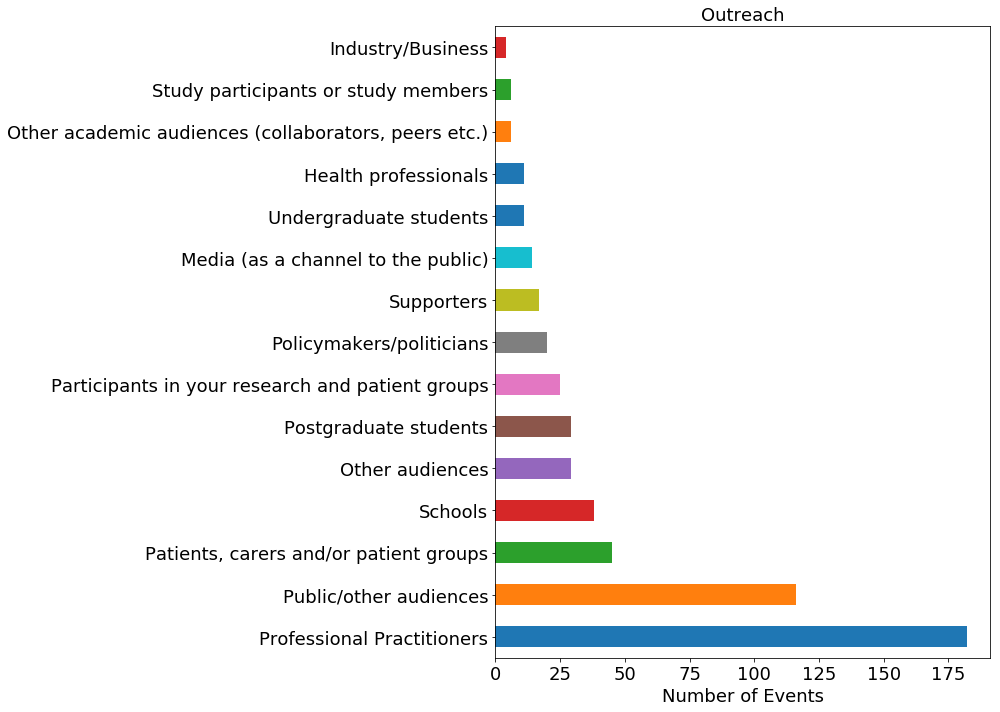

In [51]:
plt.figure(figsize=(14,10))
outreach['Primary Audience*'].value_counts().plot.barh(fontsize=18)
plt.title('Outreach',fontsize=18)
plt.xlabel('Number of Events',fontsize=18)

plt.tight_layout()
plt.savefig('plots/ResearchFish/outreach.png',dpi=300)

In [22]:
outreach['Form of Dissemination*'].value_counts()

A talk or presentation                                                        293
Participation in an activity, workshop or similar                              86
A formal working group, expert panel or dialogue                               57
Participation in an open day or visit at my research institution               56
A magazine, newsletter or online publication                                   27
A press release, press conference or response to a media enquiry/interview     26
A broadcast e.g. TV/radio/film/podcast (other than news/press)                  6
Engagement focused website, blog or social media channel                        2
Name: Form of Dissemination*, dtype: int64

In [23]:
outreach['Geographical Reach*'].value_counts()

National         174
International    151
Regional         135
Local             93
Name: Geographical Reach*, dtype: int64

In [24]:
awards = pd.read_excel('data/ResearchFish/ResearchFish_awards-and-recognition.xlsx')
#awards = awards[awards['MasterID'].isin(glaucoma_ids)]

awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 34 columns):
Award Reference                   334 non-null object
Award Type                        266 non-null object
Title                             334 non-null object
RO Location ID                    334 non-null object
RO                                334 non-null object
Award Start Date                  334 non-null object
Award End Date                    334 non-null object
Funding Value                     334 non-null int64
RF UID                            334 non-null int64
PI ID                             334 non-null int64
PI Name                           334 non-null object
PI Surname                        334 non-null object
PI Email                          334 non-null object
Award Reporting Period ID         334 non-null object
Award Submission Date             257 non-null object
Entry ID                          334 non-null object
Entry Insert Date                 

In [25]:
awards['Type*'].value_counts()

Personally asked as a key note speaker to a conference                          147
Prestigious/honorary/advisory position to an external body                       41
Research prize                                                                   40
Appointed as the editor/advisor to a journal or book series                      28
Poster/abstract prize                                                            27
Awarded honorary membership, or a fellowship, of a learned society               16
Personally invited as speaker at a conference                                    13
Attracted visiting staff or user to your research group                           8
Medal                                                                             6
Honorary Degree                                                                   4
National honour e.g. Order of Chivalry, OBE                                       2
Appointed to the editorial board of, or advisor to, a journal or book series